### <div align="center">Unsupervised Learning</div>

##### 9.2: K Means Clustering: Theory
- K-means clustering is a method to group data into clusters where each piece of data is closest to the central point or centroid of its cluster.
  1. Start with K centroids by putting them at random place. Here k = 2 (random).
  2. Compute distance of every point from centroid and cluster them accordingly.
  3. Adjust centroids so that they become center of gravity for given cluster.
  4. Again re-cluster every point based on their distance with centroid.
  5. Again adjust centroids.
  6. Recompute clusters and repeat this till data points stop changing clusters.
- SSE: Sum of Squared Errors
  - To find the optimal number of clusters (k) using SSE, plot the sum of squared distances from each data point to its cluster's centroid. Then, select k where the decrease in SSE starts to level off, known as the elbow point.

##### 9.3: K Means Clustering: Customer Segmentation
- K-means clustering might not perform well if the data is on different scales. It is recommended to pre process the data and scale it using the min-max method or standard scaling method.
- In real-world situations, having many features can make it difficult to determine the value of k. To address this, we compute SSE for each k and plot the elbow chart to find the optimal k.
- In k-means, there is an API called inertia, which represents the sum of squared distances (errors).

##### 9.4: Hierarchical Clustering: Theory
- Hierarchical clustering is a technique that constructs a tree of clusters by grouping similar data points, beginning with individual points and progressively merging them into larger clusters.
- Steps:
  1. Treat each data point as its own cluster.
  2. Measure distances between clusters.
  3. Merge the closest clusters.
  4. Recalculate distances.
  5. Repeat until all data points form one cluster.
  6. Optionally, you can create a dendrogram, a tree diagram showing merge sequences and distances.
- Types:
  - Agglomerative Clustering - Popular one
  - Divisive Clustering
- Linkage methods in hierarchical clustering determine cluster distances and formation. These methods include:
  1. Average Linkage: Average distance between all point pairs in two clusters.
  2. Single Linkage: Shortest distance between any two points in different clusters.
  3. Complete Linkage: Longest distance between any two points in different clusters.
  4. Ward's Linkage: Minimizes the increase in within-cluster variance after merging.

##### 9.5: Hierarchical Clustering: Customer Segmentation
- A dendrogram is a tree-like diagram that illustrates the arrangement and merging levels of data points in hierarchical clustering.
- The scipy library provides a range of APIs specifically designed for Hierarchical Clustering.
- Based on the use case we need to use linkage technique.
- Comparing different hierarchical linkage methods
  - https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

##### 9.8: DBSCAN: Theory
- Disadvantage:
  1. KMeans is not good at handling outliers.
  2. In KMeans we need to provide no of cluster (k), sometimes it is hard to get elbow.
  3. DBScan solves the above problem.
- DBSCAN is a clustering algorithm that groups data points into clusters based on density; it identifies core points (with many neighbors), border points (fewer neighbors but close to a core point), and marks isolated points in low-density areas as outliers.
  Steps:
  - Choose eps (max neighbor distance) and minPts (min points for a cluster).
  - Classify points with at least minPts within eps as core points.
  - Points within eps of core points but with fewer than minPts neighbors are border points.
  - Non-core and non-border points are outliers.
  - Form clusters by connecting core points and their neighbors, including border points.
  - Assign each point to a cluster or as an outlier.
- Benefits:
  - Good at handling outliers.
  - No need to specify the number of clusters.
  - Faster compared to other clustering methods.
  - Good at handling weird shapes of data
##### 9.9: DBSCAN - Practical Implementation
- Best eps and min_samples can be figured out with trial and error and by examining the scatter plot for the DBSCAN method. This can be mastered with some practice.
- For outlier detection, DBSCAN is a highly effective and straightforward solution.
- Experiment with the parameters to determine the ones that best fit your dataset and use case.

### Problem Statement
You are a data scientist / AI engineer working on an unsupervised learning problem. You have been provided with a dataset named **`"wine_clustering_data.csv"`**, which includes information about various attributes from a chemical analysis of wines. The dataset comprises the following columns:

- `alcohol:` Alcohol content in the wine.
- `malic_acid:` Malic acid content in the wine.
- `ash:` Ash content in the wine.
- `ash_alcanity:` Alcalinity of the ash in the wine.
- `magnesium:` Magnesium content in the wine.
- `total_phenols:` Total phenolic content in the wine.
- `flavanoids:` Flavanoid content in the wine.
- `nonflavanoid_phenols:` Nonflavanoid phenolic content in the wine.
- proanthocyanins:` Proanthocyanin content in the wine.
- `color_intensity:` Color intensity of the wine.
- `hue:` Hue of the wine.
- `od280:` OD280/OD315 ratio of the wine.
- `proline:` Proline content in the wine.

Your task is to use this dataset to apply `DBSCAN clustering` to identify natural groupings based on these chemical properties. You will also visualize the clusters.

**Dataset credits:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine)

In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

### Task 1: Data Preparation and Exploration

1. Import the data from the `"wine_clustering_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use `describe()` to get the summary statistics for each feature.
5. Visualize the distribution of each feature using histograms.

In [5]:
# Step 1: Import the dataset
df = pd.read_csv("../data/wine_clustering_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (178, 13)
First few rows of the dataset:


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Step 4: Use describe() to get the summary statistics for each feature
print("Summary statistics:")
df.describe()

Summary statistics:


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


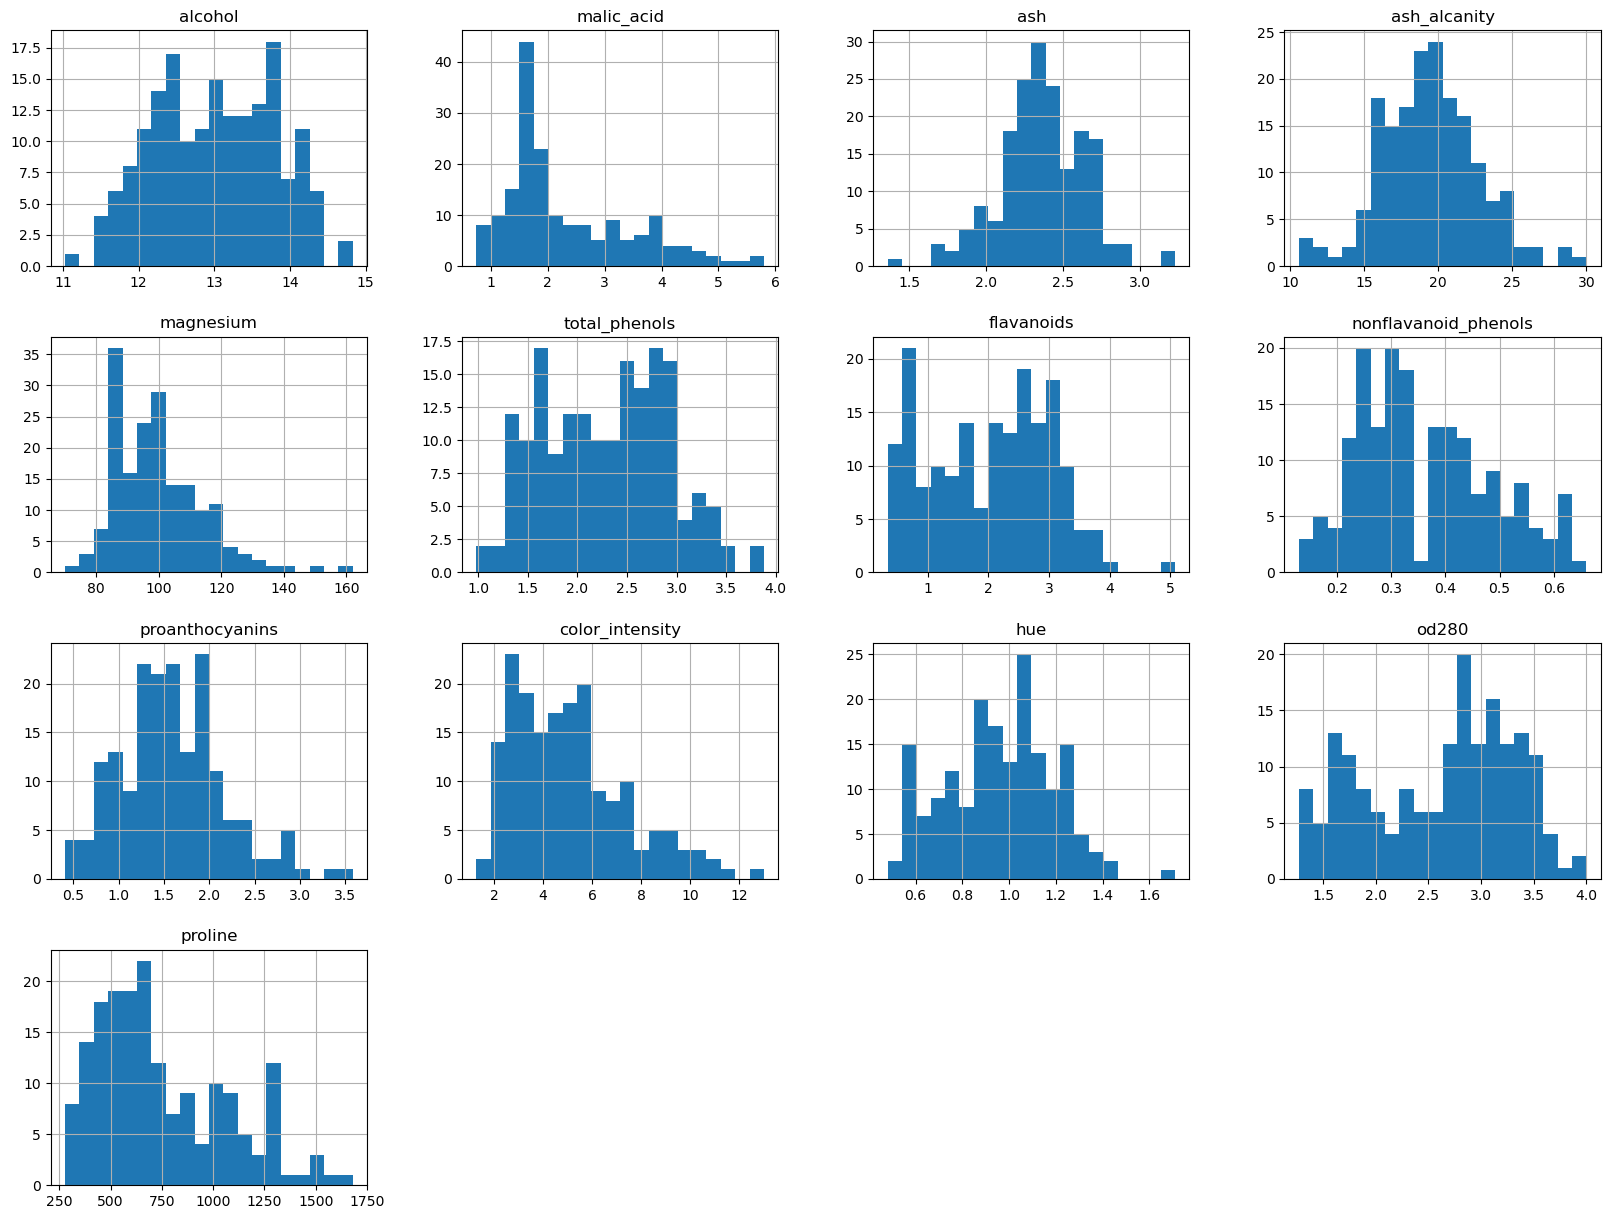

In [7]:
# Step 5: Visualize the distribution of each feature using histograms
df.hist(bins=20, figsize=(20, 15))
plt.show()

### Task 2: Standardization

1. Use `StandardScaler` to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.

In [8]:
# Step 1: Use StandardScaler to standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# show few rows
df_scaled.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Task 3: Initial DBSCAN Clustering

1. Apply DBSCAN clustering to the standardized data with `eps=2 and min_samples=2`.
2. Add the cluster labels to the original DataFrame.
3. Visualize the clusters using a scatter plot for a pair of features (e.g., alcohol and malic_acid).

In [9]:
# Step 1: Apply DBSCAN clustering to the standardized data with eps=2 and min_samples=2
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(df_scaled)

DBSCAN(eps=2, min_samples=2)

In [10]:
# Step 2: Add the cluster labels to the original DataFrame
df['cluster'] = dbscan.labels_
#show few rows
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


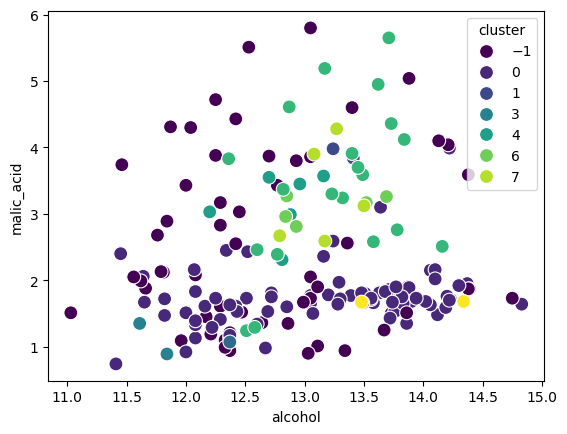

In [11]:
# Step 3: Visualize the clusters using a scatter plot for a pair of features
sns.scatterplot(data=df, x='alcohol', y='malic_acid', hue='cluster', palette='viridis', s=100)
plt.show()

### Task 4: Parameter Tuning

1. Experiment with different values of eps (2, 3.5, 4) and min_samples (2, 4, 6) to see how the clustering results change.
2. Visualize the clusters using scatter plots with different parameter settings for a pair of features (e.g., alcohol and malic_acid).

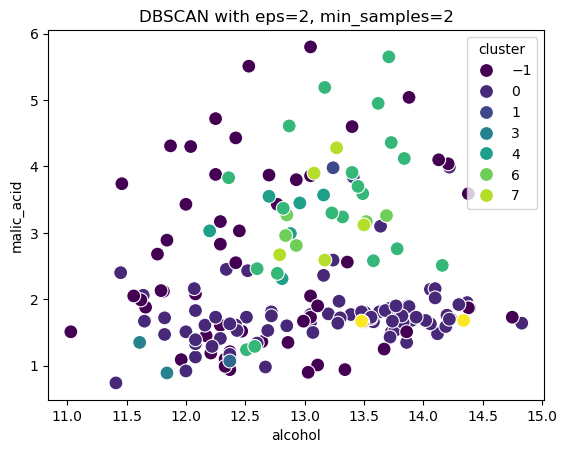

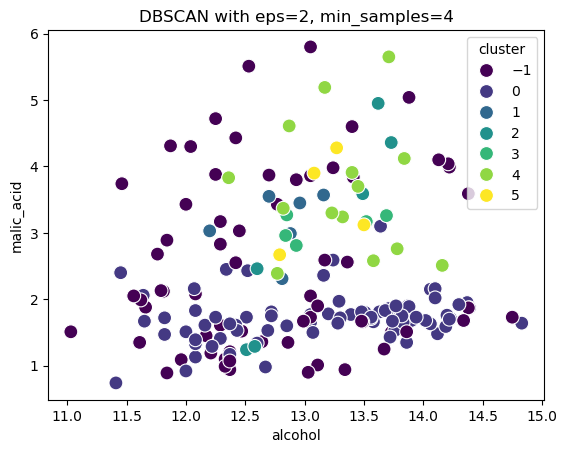

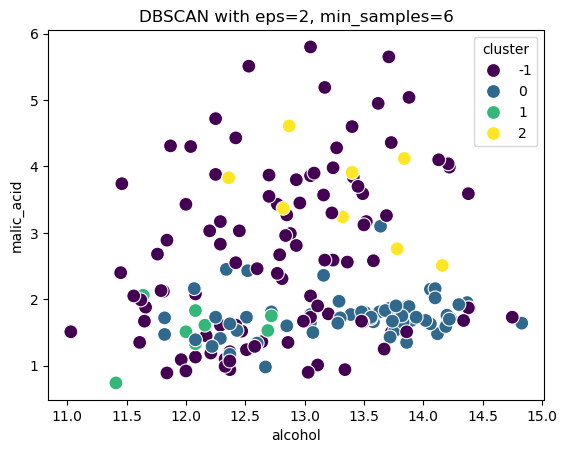

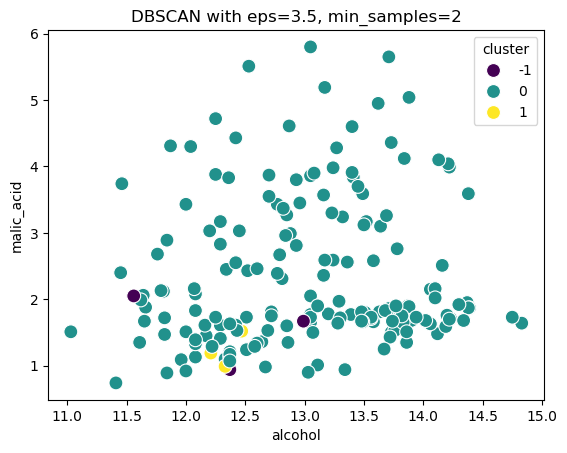

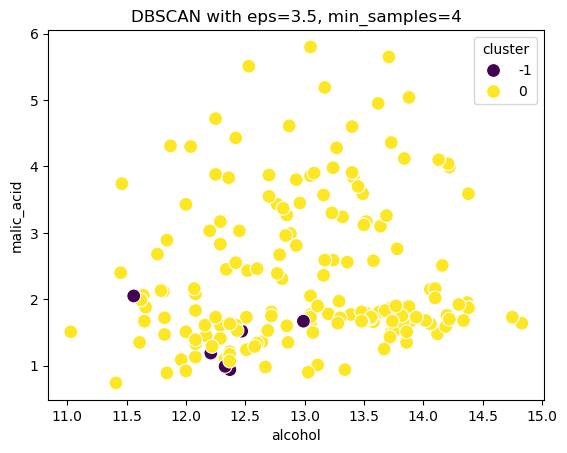

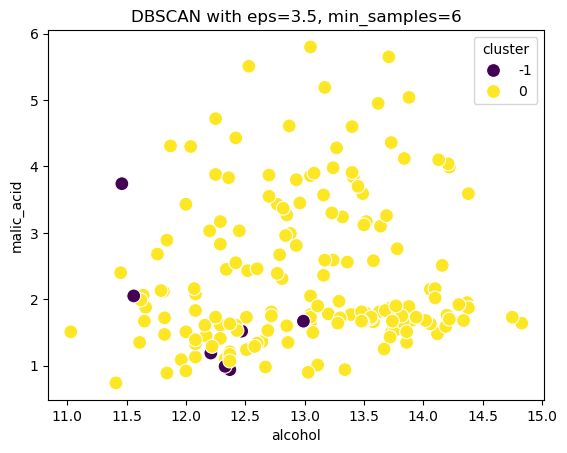

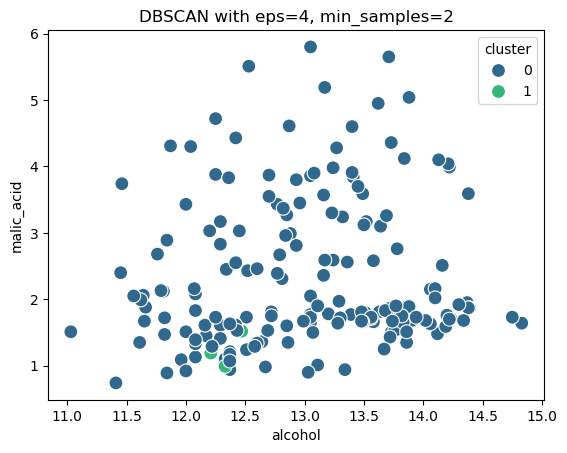

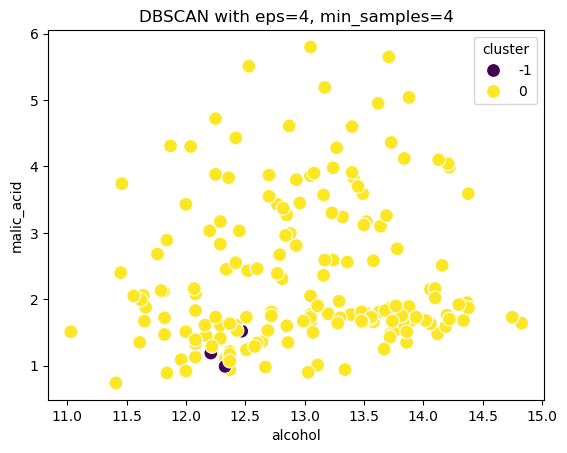

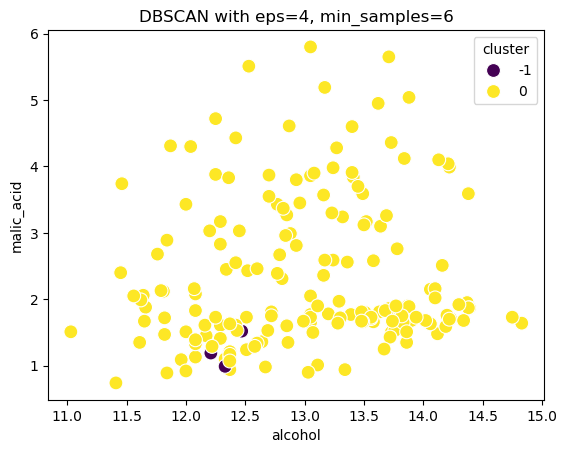

In [12]:
# Task 4: Parameter Tuning
# Experiment with different values of `eps` (2, 3.5, 4) and `min_samples` (2, 4, 6)
for eps in [2, 3.5, 4]:
    for min_samples in [2, 4, 6]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_scaled)
        df['cluster'] = dbscan.labels_
        
        # Visualize the clusters using scatter plots for different parameter settings
        plt.figure()
        sns.scatterplot(data=df, x='alcohol', y='malic_acid', hue='cluster', palette='viridis', s=100)
        plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}')
        plt.show()